In [17]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(".."))

from utils.db import fetch_sanctions

In [33]:
df = fetch_sanctions()
df.head()

,ent_num,sdn_name,sdn_type,program,title,call_sign,vess_type,tonnage,grt,vess_flag,...,add_num,address,complete_address,country,add_remarks,alt_num,alt_type,alt_name,alt_remarks,cleaned_name
0,36,AEROCARIBBEAN AIRLINES,None,CUBA,None,None,None,None,None,None,...,25,None,Havana,Cuba,None,12.0,aka,AERO-CARIBBEAN,None,AEROCARIBBEAN AIRLINES
1,173,"ANGLO-CARIBBEAN CO., LTD.",None,CUBA,None,None,None,None,None,None,...,129,"Ibex House, The Minories",London EC3N 1DY,United Kingdom,None,57.0,aka,AVIA IMPORT,None,ANGLO CARIBBEAN CO LTD
2,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,202,Federico Boyd Avenue & 51 Street,Panama City,Panama,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
3,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,200,Avenida de Concha Espina 8,Madrid E-28036,Spain,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA
4,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,201,"Dai-Ichi Bldg. 6th Floor, 10-2 Nihombashi, 2-c...",Tokyo 103,Japan,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA


In [34]:
df.info()
df.describe(include="all")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49339 entries, 0 to 49338
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ent_num           49339 non-null  int64  
 1   sdn_name          49339 non-null  object 
 2   sdn_type          18657 non-null  object 
 3   program           49339 non-null  object 
 4   title             2380 non-null   object 
 5   call_sign         690 non-null    object 
 6   vess_type         1201 non-null   object 
 7   tonnage           107 non-null    object 
 8   grt               195 non-null    object 
 9   vess_flag         1277 non-null   object 
 10  vess_owner        6 non-null      object 
 11  remarks           48414 non-null  object 
 12  add_num           49339 non-null  int64  
 13  address           30380 non-null  object 
 14  complete_address  34859 non-null  object 
 15  country           44321 non-null  object 
 16  add_remarks       0 non-null      object

ent_num                 0
sdn_name                0
sdn_type            30682
program                 0
title               46959
call_sign           48649
vess_type           48138
tonnage             49232
grt                 49144
vess_flag           48062
vess_owner          49333
remarks               925
add_num                 0
address             18959
complete_address    14480
country              5018
add_remarks         49339
alt_num             11171
alt_type            11171
alt_name            11171
alt_remarks         49339
cleaned_name            0
dtype: int64

In [35]:
# Sanity check for uniqueness
df['ent_num'].nunique(), df.duplicated().sum()

(17852, np.int64(0))

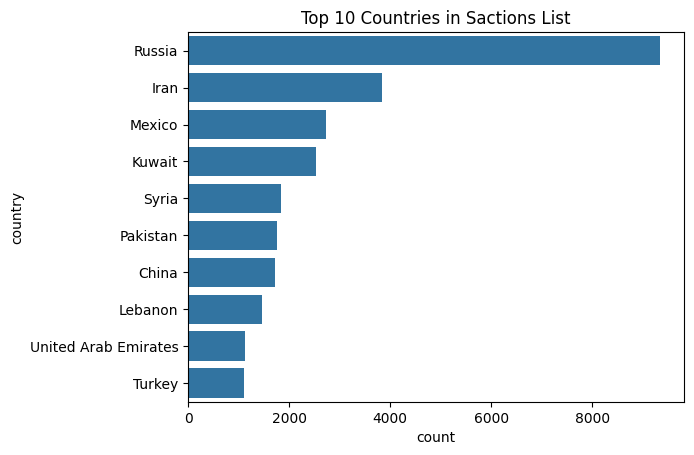

In [41]:
sns.countplot(data=df, y='country', order=df['country'].value_counts().head(10).index)
plt.title("Top 10 Countries in Sactions List")
plt.show()

<Axes: title={'center': 'SDN Types Distribution'}, ylabel='sdn_type'>

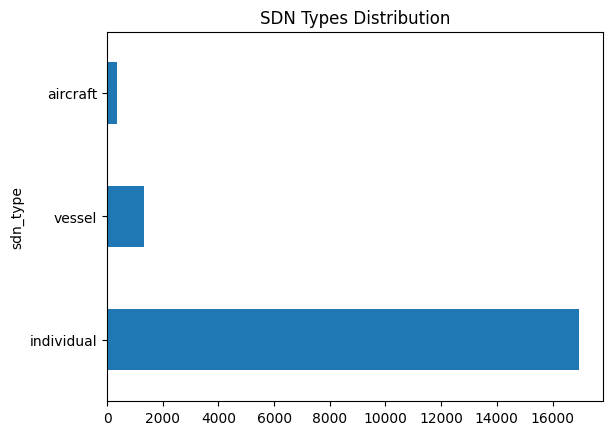

In [44]:
df['sdn_type'].value_counts().plot(kind='barh', title="SDN Types Distribution")

In [49]:
import re

def standardize_name(name: str) -> str:
    if pd.isnull(name):
        return ''
    name = re.sub(r"[/-]", " ", name).upper()
    name = re.sub(r"[^A-Z\s]", "", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name

df['cleaned_name'] = df['sdn_name'].apply(standardize_name)

In [53]:
df['name_length'] = df['cleaned_name'].str.len()
df['word_count'] = df['cleaned_name'].str.split().apply(len)
df['has_country_in_name'] = df.apply(
    lambda row: 1 if row['country'] and row['country'].upper() in row['cleaned_name'] else 0,
    axis=1
)

df.head(10)

,ent_num,sdn_name,sdn_type,program,title,call_sign,vess_type,tonnage,grt,vess_flag,...,country,add_remarks,alt_num,alt_type,alt_name,alt_remarks,cleaned_name,name_length,word_count,has_country_in_name
0,36,AEROCARIBBEAN AIRLINES,None,CUBA,None,None,None,None,None,None,...,Cuba,None,12.0,aka,AERO-CARIBBEAN,None,AEROCARIBBEAN AIRLINES,22,2,0
1,173,"ANGLO-CARIBBEAN CO., LTD.",None,CUBA,None,None,None,None,None,None,...,United Kingdom,None,57.0,aka,AVIA IMPORT,None,ANGLO CARIBBEAN CO LTD,22,4,0
2,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,Panama,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA,22,4,0
3,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,Spain,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA,22,4,0
4,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,Japan,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA,22,4,0
5,306,BANCO NACIONAL DE CUBA,None,CUBA,None,None,None,None,None,None,...,Switzerland,None,220.0,aka,NATIONAL BANK OF CUBA,None,BANCO NACIONAL DE CUBA,22,4,0
6,424,BOUTIQUE LA MAISON,None,CUBA,None,None,None,None,None,None,...,Panama,None,NaN,None,None,None,BOUTIQUE LA MAISON,18,3,0
7,475,CASA DE CUBA,None,CUBA,None,None,None,None,None,None,...,Mexico,None,NaN,None,None,None,CASA DE CUBA,12,3,0
8,475,CASA DE CUBA,None,CUBA,None,None,None,None,None,None,...,Spain,None,NaN,None,None,None,CASA DE CUBA,12,3,0
9,480,"CECOEX, S.A.",None,CUBA,None,None,None,None,None,None,...,Panama,None,NaN,None,None,None,CECOEX SA,9,2,0


In [54]:
df.to_csv('../data/sanctions_cleaned.csv', index=False)